## Importing Libraries

In [3]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

## Loading image

I convert the image to *uint16* in order to avoid problems in computations (overflow)

In [4]:
img = image.imread('Enhance2.jpg').astype('uint16')

In [5]:
img.shape

(2448, 3264, 3)

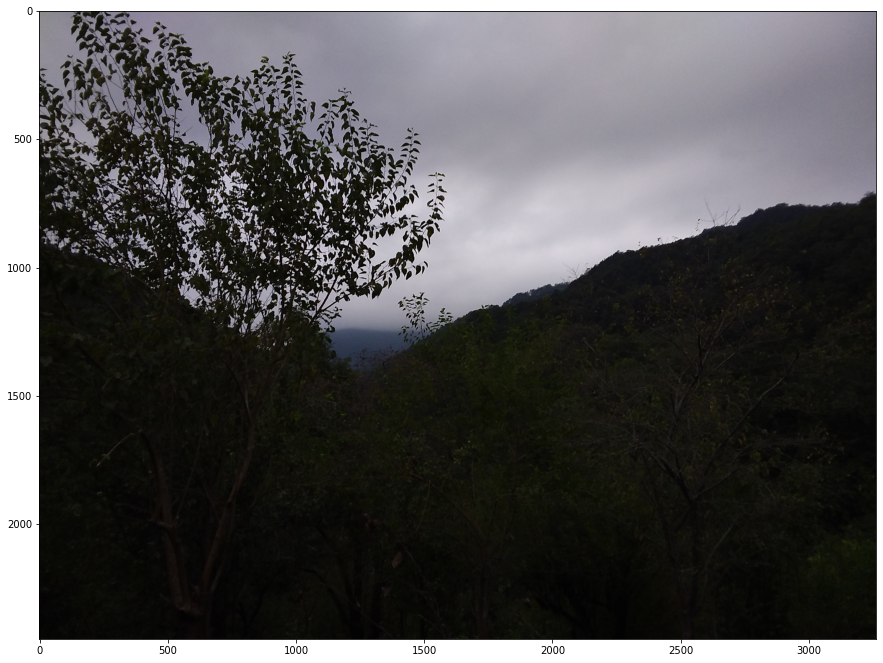

In [6]:
plt.figure(figsize=(15, 15))
plt.imshow(img);

## Visualization of different channels

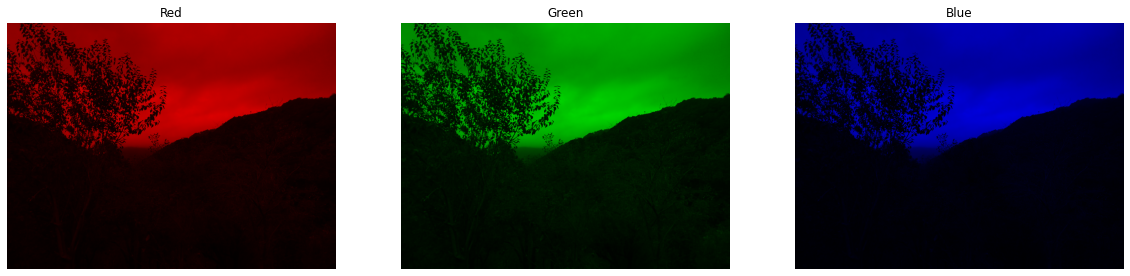

In [7]:
fig, axs = plt.subplots(1, 3, figsize = (20, 10))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    img_cpy = img.copy()
    img_cpy[:, :, [j for j in range(3) if j != i]] = 0
    axs[i].imshow(img_cpy)
    axs[i].axis('off')
    axs[i].set_title(color)

## Image Enhancement
Here we test different methods (which is described in the course slides)

- $min(x+50, 255)$

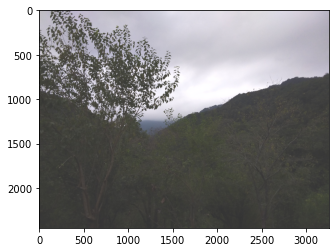

In [8]:
plt.imshow(np.minimum(img+50, 255));

- $min(5x, 255)$

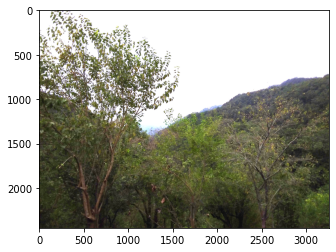

In [9]:
plt.imshow(np.minimum(5*img, 255));

- $\frac{255}{log(256)}log(1+x)$

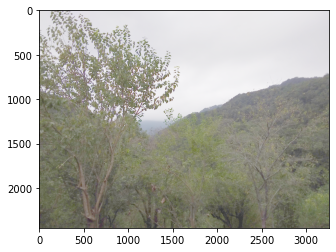

In [10]:
plt.imshow((255 * np.log(1+img) / np.log(256)).astype(int));

- $\frac{255 log(1 + \alpha x)}{log(1 + 255\alpha)}$

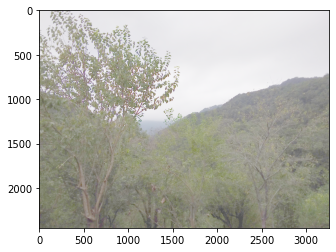

In [11]:
alpha = 3
plt.imshow((255 * np.log(1 + alpha*img) / np.log(1 + 255*alpha)).astype(int));

- $255 (\frac{x}{255})^2$

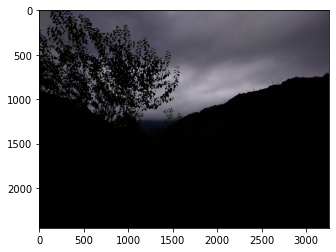

In [12]:
plt.imshow(np.minimum(255, (255 * (img/255)**2).astype(int)));

- $y = \begin{cases}
    5x & x \lt 40 \\
    x &  40 \le x \lt 210 \\
    x - 20 & 210 \le x
\end{cases}$

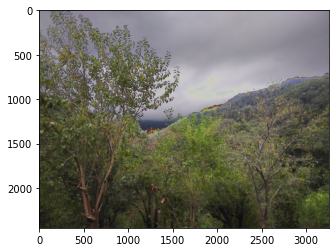

In [13]:
def f(x):
    if x < 40:
        return 5*x
    elif x < 210:
        return x
    return x-20
        
fv = np.vectorize(f)

plt.imshow(fv(img));

## Contrast Enhancement
Details are written in the report of question #1 (in `q1.ipynb` file)

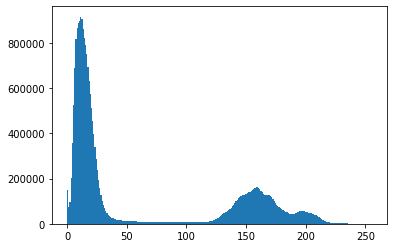

In [14]:
plt.hist(img.flatten(), bins=range(256));

In [26]:
def contrast_enhancement(img):
    result = img.copy()
    colors, cnt = np.unique(img.flatten(), return_counts=True)
    new_colors = np.cumsum(cnt)
    new_colors = 255 * new_colors / new_colors[-1]
    for color, new_color in zip(colors, new_colors):
        result[img == color] = new_color
    
    return result 

In [16]:
contrast_enhancement_img = contrast_enhancement(img)

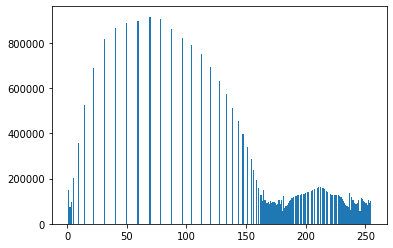

In [17]:
plt.hist(contrast_enhancement_img.flatten(), bins=range(256));

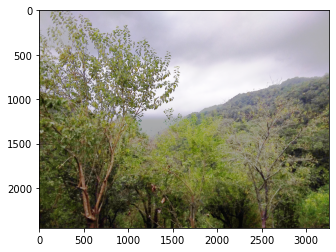

In [18]:
plt.imshow(contrast_enhancement_img);

### on value (in HSV)

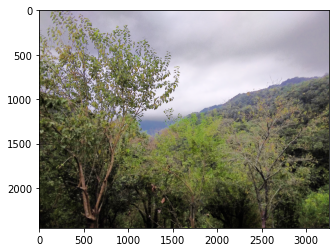

In [35]:
hsv_img = rgb_to_hsv(img)
hsv_img[:, :, 2] = contrast_enhancement(hsv_img[:, :, 2])
rgb_img = hsv_to_rgb(hsv_img).astype('int')
plt.imshow(rgb_img);

## Best Result

Contrast Enhancement on Value (in HSV)

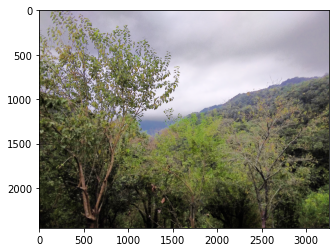

In [36]:
plt.imshow(rgb_img);